In [1]:
#img recognition example, there are 60k imgs and 10 classes 6k imgs on each class. Equally diversed dataset. rgb imgs with 
#32*32 imgs.

#check data source for more info: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
#needed libraries at first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10 as c10

Using TensorFlow backend.


In [3]:
(X_train, y_train) , (X_test, y_test) = c10.load_data()
#dataset is approximately 170 mb

In [4]:
#as we can see here 50k imgs in 32*32 format with rgb coloring as train set
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
#as u can guess y_train example is in 50k*1 format.
y_train.shape

(50000, 1)

In [7]:
#and 10k*1 format as test labels.
y_test.shape

(10000, 1)

In [8]:
#starting with visualizing part. lets see our data a little.

[7]


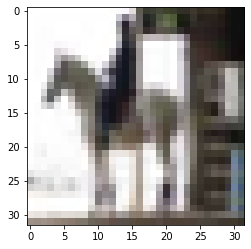

In [9]:
#change "i" and u can see couple of imgs.
i = 29800
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\berka\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


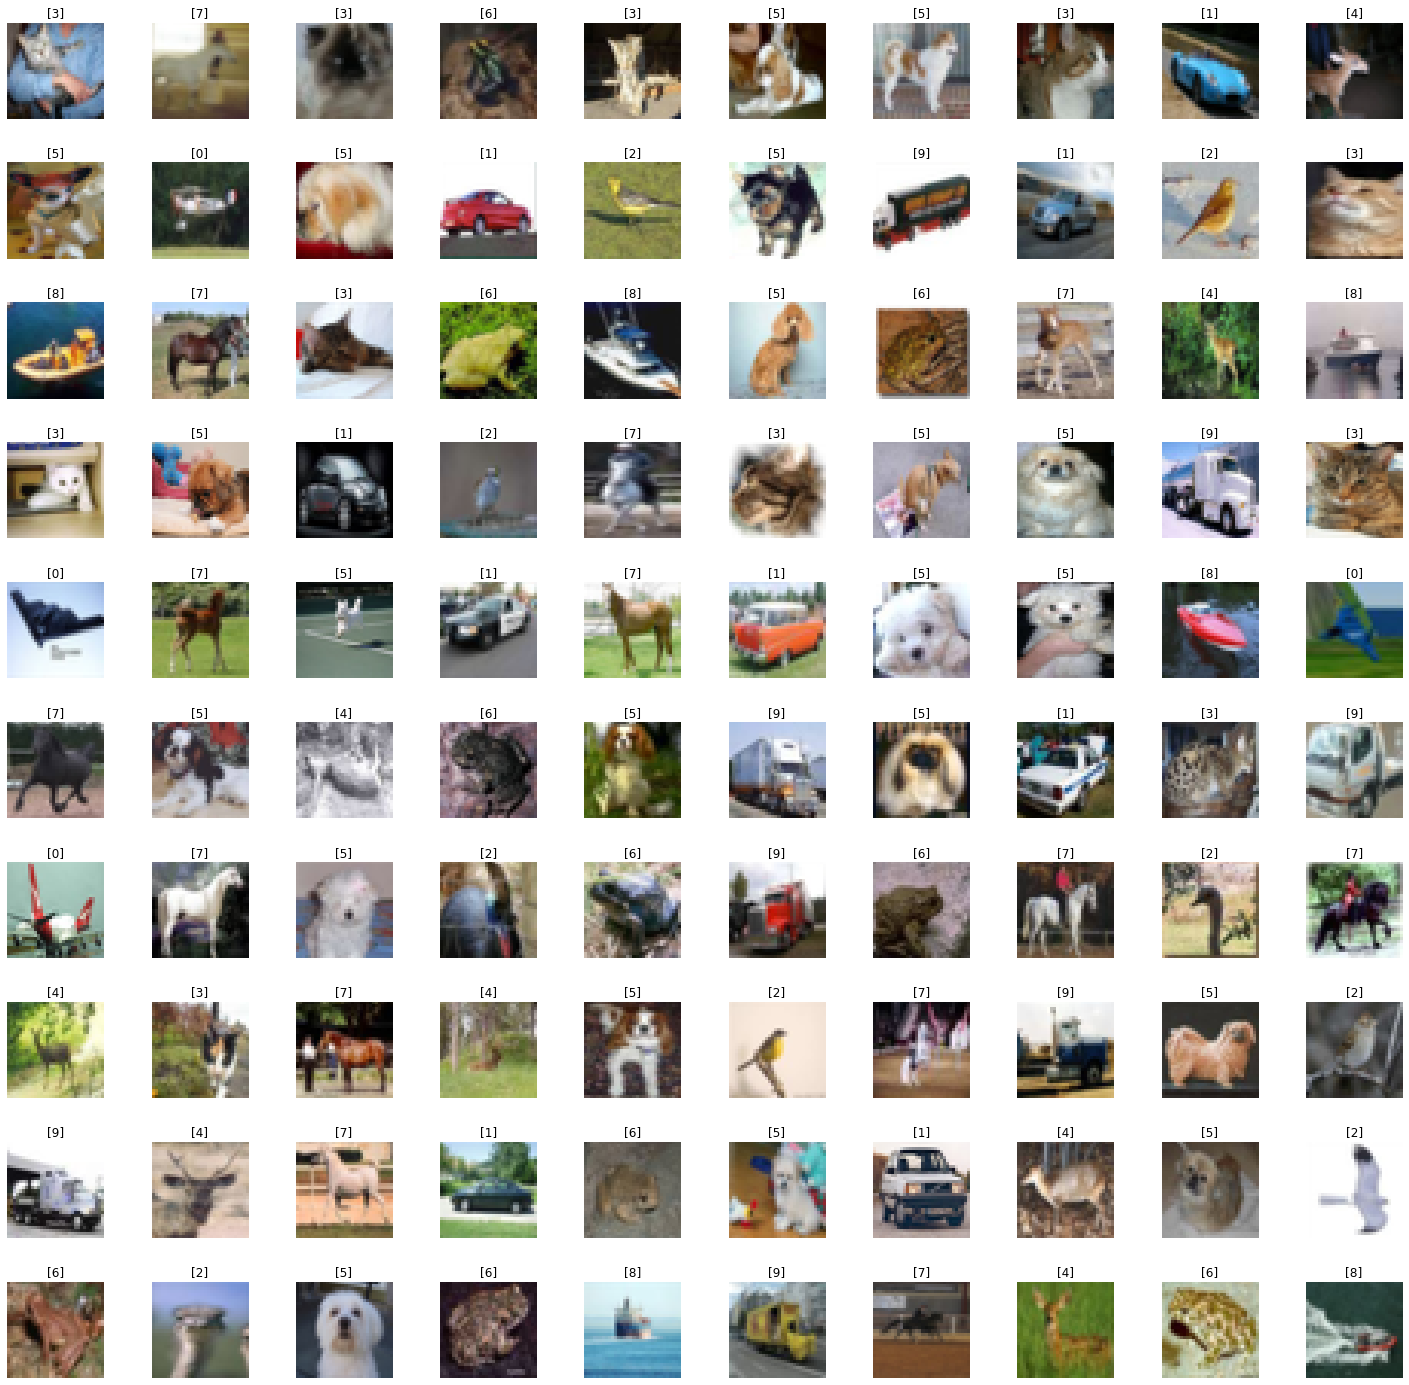

In [11]:
#subplot logic and couple visual examples.
wg=10
lg=10


fig,axes=plt.subplots(lg,wg,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)

for i in np.arange(0,wg*lg):
    #creating integers as index from 0 to n_training, n_training is 50k for this ex.
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    #this ll show wg*lg amount of imgs.also its a good idea to close axis bcs we know its 32*32
    axes[i].axis("off")
    #we can also add the label of the img as well.labels are just a number for now
    axes[i].set_title(y_train[index])
    #also we can shift imgs as well to make it more visible
    
plt.subplots_adjust(hspace=0.4,wspace=0.5)
#height_space and width_space.

In [12]:
#we need to turn our datasets into float type 1st, we are gonna use them in float format later
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
#float format is needed in data_augmentation and training parts.

In [13]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
#we have 10 classes, however we dont have 10 output neurons. we need to change this as well.
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
#10 is the # of categories

In [17]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_train.shape
#50k imgs from 10 categories. is_cat is_dog is_deer etc.

(50000, 10)

In [19]:
#do same transformation for y_test as well, these procedures are needed for deep learning network to work
y_test=keras.utils.to_categorical(y_test,10)

In [20]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [21]:
#normalization is needed as well. for almost all ml and dl cases,normalization is needed to get correct and fast result
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
#we need img shape for model part
input_shape = X_train.shape[1:]

In [25]:
input_shape

(32, 32, 3)

In [26]:
#model training part, this is our needed libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [28]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [29]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

Epoch 1/1


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at C:\Users\berka\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_1573]

Function call stack:
keras_scratch_graph


In [50]:
#model evaluation of the cnn model.
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at C:\Users\berka\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_1719]

Function call stack:
keras_scratch_graph


In [ ]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
##u can save the model if you want
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [ ]:
#additional part. how to increase model performance by incrasing images that are flipped,rotated,skewed from the org imgs.
#u can also change brightness of the images as well. now your model will be try to predict correctly this imgs.

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8 
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
#imagedatagenerator uses your img and adjust it differently, this will increase model generalization, make it less prone to
#overfit.

from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
#u can save the model as well if u want
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)